## Wrapper Methods

In this project, I'll analyze data from a survey conducted by Fabio Mendoza Palechor and Alexis de la Hoz Manotas that asked people about their eating habits and weight. The data was obtained from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition+). Categorical variables were changed to numerical ones in order to facilitate analysis.

First, I'll fit a logistic regression model to try to predict whether survey respondents are obese based on their answers to questions in the survey. After that, I'll use three different wrapper methods to choose a smaller feature subset.

I'll use sequential forward selection, sequential backward floating selection, and recursive feature elimination. After implementing each wrapper method, I'll evaluate the model accuracy on the resulting smaller feature subsets and compare that with the model accuracy using all available features.

In [140]:
# Import libraries
import pandas as pd
from pandas import read_csv
from sklearn.linear_model import LogisticRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.feature_selection import RFE

## Evaluating a Logistic Regression Model

The data set `obesity` contains 18 predictor variables. Here's a brief description of them.

* `Gender` is `1` if a respondent is male and `0` if a respondent is female.
* `Age` is a respondent's age in years.
* `family_history_with_overweight` is `1` if a respondent has family member who is or was overweight, `0` if not.
* `FAVC` is `1` if a respondent eats high caloric food frequently, `0` if not.
* `FCVC` is `1` if a respondent usually eats vegetables in their meals, `0` if not.
* `NCP` represents how many main meals a respondent has daily (`0` for 1-2 meals, `1` for 3 meals, and `2` for more than 3 meals).
* `CAEC` represents how much food a respondent eats between meals on a scale of `0` to `3`.
* `SMOKE` is `1` if a respondent smokes, `0` if not.
* `CH2O` represents how much water a respondent drinks on a scale of `0` to `2`.
* `SCC` is `1` if a respondent monitors their caloric intake, `0` if not.
* `FAF` represents how much physical activity a respondent does on a scale of `0` to `3`.
* `TUE` represents how much time a respondent spends looking at devices with screens on a scale of `0` to `2`.
* `CALC` represents how often a respondent drinks alcohol on a scale of `0` to `3`.
* `Automobile`, `Bike`, `Motorbike`, `Public_Transportation`, and `Walking` indicate a respondent's primary mode of transportation. Their primary mode of transportation is indicated by a `1` and the other columns will contain a `0`.

The outcome variable, `NObeyesdad`, is a `1` if a patient is obese and a `0` if not.

Using the `.head()` method and inspect the data.

In [141]:
# https://archive.ics.uci.edu/ml/datasets/Estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition+

# Load the data
obesity = pd.read_csv("obesity.csv")
# obesity.drop(columns=['0be1dad'])
# Inspect the data
obesity.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,...,TUE,CALC,Automobile,Bike,Motorbike,Public_Transportation,Walking,MTRANS,0be1dad,0be1dad_Encoded
0,0,21.0,1.62,64.0,1,0,2.0,3.0,1,0,...,1.0,0,0,0,0,1,0,Public_Transportation,0rmal_Weight,0
1,0,21.0,1.52,56.0,1,0,3.0,3.0,1,1,...,0.0,1,0,0,0,1,0,Public_Transportation,0rmal_Weight,0
2,1,23.0,1.80,77.0,1,0,2.0,3.0,1,0,...,1.0,2,0,0,0,1,0,Public_Transportation,0rmal_Weight,0
3,1,27.0,1.80,87.0,0,0,3.0,3.0,1,0,...,0.0,2,0,0,0,0,1,Walking,Overweight_Level_I,0
4,1,22.0,1.78,89.8,0,0,2.0,1.0,1,0,...,0.0,1,0,0,0,1,0,Public_Transportation,Overweight_Level_II,0


### Split the data into `X` and `y`, Omitting redundant categorical features first

In order to use a linear regression model, I'll need to split the data into two parts: the predictor variables and an outcome variable. Do this by splitting the data into a DataFrame of predictor variables called `X` and a Series of outcome variables `y`.

In [142]:
X = obesity.drop(columns=['0be1dad_Encoded', 'MTRANS', '0be1dad'], axis=1) 
y = obesity['0be1dad_Encoded']

### Logistic regression model

Creating a logistic regression model called `lr`. Including the parameter `max_iter=2000` to make sure that the model will converge when I try to fit it.

In [145]:
lr = LogisticRegression(max_iter=2000)

### Fit the model

Use the `.fit()` method on `lr` to fit the model to `X` and `y`.

In [146]:
lr.fit(X, y)

LogisticRegression(max_iter=2000)

### Model accuracy

In [147]:
lr.score(X, y)

0.9649455234486025

## Sequential Forward Selection

In [148]:
# we'll try to find the 9 best features
sfs = SFS(lr,
          k_features=9,
          forward=True,
          floating=False,
          scoring='accuracy',
          cv=0)

### Fit the model

In [149]:
sfs.fit(X, y)

SequentialFeatureSelector(cv=0, estimator=LogisticRegression(max_iter=2000),
                          k_features=(9, 9), scoring='accuracy')

### Inspect the results

In [150]:
# Inspect the results
sfs.subsets_[9]

{'feature_idx': (0, 1, 2, 3, 4, 6, 8, 13, 15),
 'cv_scores': array([0.97347229]),
 'avg_score': 0.9734722880151587,
 'feature_names': ('Gender',
  'Age',
  'Height',
  'Weight',
  'family_history_with_overweight',
  'FCVC',
  'CAEC',
  'TUE',
  'Automobile')}

### Chosen features and model accuracy

In [151]:
# See which features sequential forward selection chose
print(sfs.subsets_[9]['feature_names'])

# Print the model accuracy after doing sequential forward selection
print(sfs.subsets_[9]['avg_score']) 

('Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight', 'FCVC', 'CAEC', 'TUE', 'Automobile')
0.9734722880151587


### Visualize model accuracy

/Users/ammaar/opt/anaconda3/envs/FeatureSelection_WrapperMethods_Project/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/ammaar/opt/anaconda3/envs/FeatureSelection_WrapperMethods_Project/lib/python3.8/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


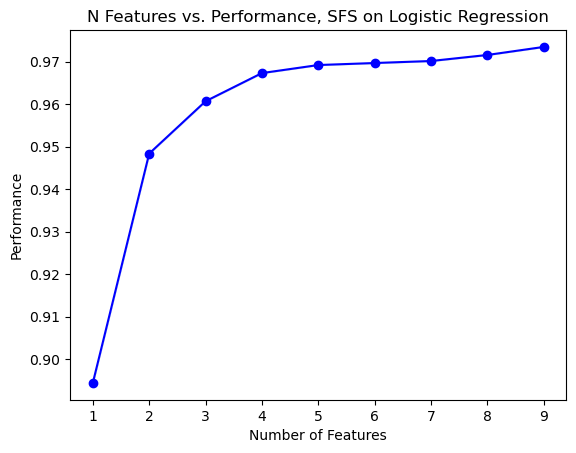

In [157]:
plot_sfs(sfs.get_metric_dict())
plt.title('N Features vs. Performance, SFS on Logistic Regression')
plt.show()

## Sequential Backward Selection

Sequential forward selection was able to find a feature subset that performed marginally better than the full feature set 96.49% --> 97.35%. Let's use the sbs sequential method and see how it compares.

In [153]:
sbs = SFS(lr,
          k_features=7,
          forward=False,
          floating=False,
          scoring='accuracy',
          cv=0)

### Fit the model

In [154]:
sbs.fit(X, y)

SequentialFeatureSelector(cv=0, estimator=LogisticRegression(max_iter=2000),
                          forward=False, k_features=(7, 7), scoring='accuracy')

### Inspect the results

In [155]:
sbs.subsets_[7]

{'feature_idx': (0, 1, 2, 3, 4, 13, 15),
 'cv_scores': array([0.97299858]),
 'avg_score': 0.9729985788725722,
 'feature_names': ('Gender',
  'Age',
  'Height',
  'Weight',
  'family_history_with_overweight',
  'TUE',
  'Automobile')}

### Chosen features and model accuracy

In [156]:
# See which features sequential backward selection chose
print(sbs.subsets_[9]['feature_names'])

# Print the model accuracy after doing sequential backward selection
print(sbs.subsets_[9]['avg_score'])

('Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight', 'CAEC', 'TUE', 'Automobile', 'Motorbike')
0.9748934154429181


### Visualize model accuracy

/Users/ammaar/opt/anaconda3/envs/FeatureSelection_WrapperMethods_Project/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/ammaar/opt/anaconda3/envs/FeatureSelection_WrapperMethods_Project/lib/python3.8/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


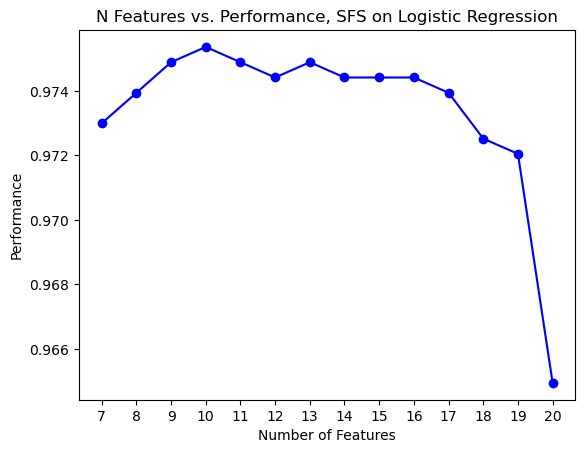

In [158]:
plot_sfs(sbs.get_metric_dict())
plt.title('N Features vs. Performance, SFS on Logistic Regression')
plt.show()

## Recursive Feature Elimination

So far we've tried two different sequential feature selection methods. Let's try one more: recursive feature elimination. First I'll standardize the data, then I'll fit the RFE model and inspect the results.

In [159]:
features = X.columns

### Standardize the data

In [160]:
X = StandardScaler().fit_transform(X)

### Recursive feature elimination model

In [161]:
# We'll try to find the 8 best features 
rfe = RFE(lr, n_features_to_select=8)

### Fit the model

In [162]:
rfe.fit(X, y)

RFE(estimator=LogisticRegression(max_iter=2000), n_features_to_select=8)

### Inspect chosen feature

In [164]:
# List of features chosen by recursive feature elimination (RFE)
rfe_features = [f for (f, support) in zip(features, rfe.support_) if support]
print(rfe_features)

['Gender', 'Height', 'Weight', 'family_history_with_overweight', 'FAVC', 'SCC', 'FAF', 'Motorbike']


### Model accuracy

In [165]:
rfe.score(X, y)

0.9971577451444813